### [Lab 6] Neural Networks
### 1. Introduction
> Neural networks are a type of machine learning algorithm inspired by the structure and function of the human brain. They consist of interconnected nodes, called neurons, organized in layers. Each connection between neurons is associated with a weight, which determines the strength of influence one neuron has on another. Neural network consists of input, hidden and output layer.

> -   In a neural network, the input layer is where the data is initially fed into the network. Each node in the input layer represents a feature or attribute of the input data.

> -   The hidden layers are layers of neurons between the input and output layers. These layers are called "hidden" because they are not directly connected to the input or output of the network. Each node in a hidden layer performs a weighted sum of its inputs, applies an activation function to the result, and passes the output to the nodes in the next layer. The presence of hidden layers allows neural networks to learn complex patterns and relationships in the data.

> - The output layer is where the final prediction or output of the network is generated. Each node in the output layer typically represents a class label (in classification tasks) or a numerical value (in regression tasks).


---
**The goal** of this lab is to implement the Feed Forward Neural Network that will be used for the digit prediction.

---
### 1.1. Dataset Explanation
> Our [dataset](https://drive.google.com/file/d/1yyVpI7Z4kwRjFA11zby-m8oUef863AnM/view?usp=drive_link) contains 5000 training samples of handwritten digits. Each record (row) of the dataset contains a 20x20 px grayscale image of a digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location.
The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Meaning, one image is represented as a 1D array (in Python list), with 400 elements. This would be your input feature X for the input layer of the model. You can download your X dataset from [here](https://meet.google.com/vvz-otgg-zzw). (It is just extracted from the original dataset)
The second part of the training set is a 5000-dimensional vector Y that contains labels for the training set. You can download the labels .csv file from the following [link](https://drive.google.com/file/d/1T8dKTHoYEJ1n8VwoYrSDQ3tGLd0-kYTS/view?usp=drive_link).

A bit of a **note**: The digit 0 is mapped to the value of 10 (the “0” digit is labeled as “10”, while the digits “1” to “9” are marked as “1” to “9” in their natural order).

The figure below shows the dataset on the left and the architecture of a neural network on the right.



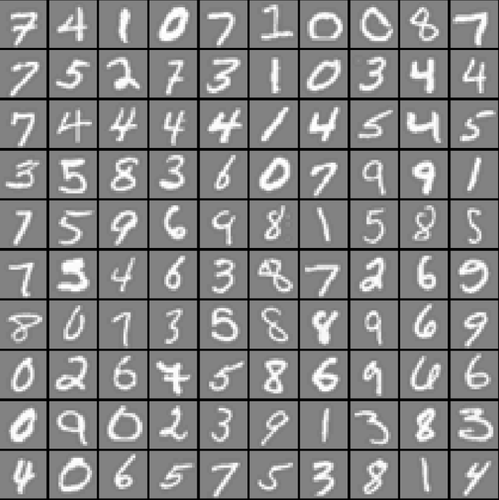
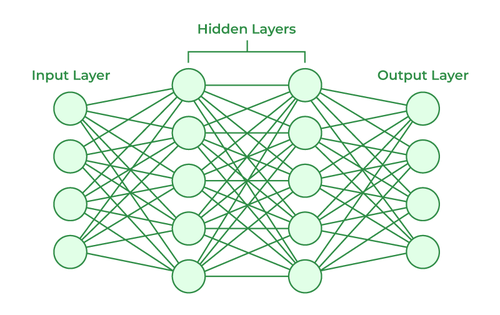

### 1.2. Helper Methods



#### 1.2.1. Read & Write Operations on a file
> In order to analyze and work with our dataset, firstly, we need to read its content. You can use the following code snippet. Additionally, you can use the helper *is_number* function, to handle possible non-numeric values in the columns.

In [1]:
def is_number(s):
    if s is None: return False
    try:
        complex(s)
    except ValueError:
        return False

    return True

def read_file(file_path, offset=1):
    try:
        with open(file_path, 'r') as file:
            data = []
            lines = file.readlines()

            keys = lines[0].split(',')
            for i in range(offset, len(lines)):
                data_row = [
                    float(cell.strip('\n')) if is_number(cell.strip('\n')) else cell.strip('\n')
                    for cell in lines[i].split(',')
                ]
                data.append(data_row)
            return data
    except FileNotFoundError:
        raise RuntimeError("File not found.")
    except Exception as e:
        raise RuntimeError(f"An error occurred: {e}")

#### 1.2.2 Matrix Methods
> To work with the records, you will need the following matrix functions:


*    transpose
*    matrix multiplication
*    concat

> Since we covered them before, you are pretty familiar with their functionalities, so we won't cover them again in details.




In [2]:
def size(A):
    rows = len(A)
    if rows > 0:
        if type(A[0]) != list:
            raise RuntimeError('matrix should be list of lists')

        cols = len(A[0])
        return rows, cols
    else:
        return 0, 0

def generate(rows, columns, default_value=0):
  A = []
  for i in range(rows):
    A.append([default_value for i in range(columns)])
  return A

def trans(A):
  rows, cols = size(A)
  At = generate(cols, rows)
  for i in range(cols):
    for j in range(rows):
      At[i][j] = A[j][i]

  return At

def concat(A, B):
  (row_A, col_A) = size(A)
  (row_B, col_B) = size(B)
  C = []
  for i in range(0, row_A):
    data_row = []
    for j in range(0,col_A):
      data_row.append(A[i][j])
    for j in range(0,col_B):
      data_row.append(B[i][j])
    C.append(data_row)
  return C

def mul(A, B):
  rows_a, cols_a = size(A)
  rows_b, cols_b = size(B)
  if cols_a != rows_b:
    raise RuntimeError('matrix dimm does not match')
  R = generate(rows_a, cols_b)
  for i in range(rows_a):
    for j in range(cols_b):
        R[i][j] = sum(A[i][k] * B[k][j] for k in range(cols_a))

  return R

In [3]:
x = read_file('./sample_data/x.csv')

y = read_file('./sample_data/y.csv')

w1 = read_file('./sample_data/weights1.csv')

w2 = read_file('./sample_data/weights2.csv')

print(x[1])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004825367647058945, -0.005166973039215696, -0.01552127919774978, -0.01616482843137255, -0.01621783088235294, -0.01609620098039215, -0.005737132352941162, 0.0006824018588724531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.153158165611269e-31, 3.785249770368984e-18, -1.396078336404909e-16, -3.266618699091798e-16, 0.001393995098038785, -0.01422504765795285, 0.002406045751633395, 0.08631982661394387, 0.0914106413398689, 0.0916362847222218, 0.0899874387254898, 0.01725616149237402, -0.007639364477600144, 0.0004382829520697331, 0.0, 0.0, 0.0, 0.0, 0.0, 0

### 2.1. Reshaping the Digit
> If you print one record of the original dataset, you will probably notice that all of the digits are represented as the 1D array, with length 400. Now, what we want to do, is to reshape the digit and represent it in form of a 20 x 20 matrix, or 2D array. You can do that by adjusting every row; when you reach the row length of 20, go into the another row, until you reach the end of the record. In simpler words, now, one record is in format 400x1. Your task is to reshape it to be in the 20x20 form. The reason we are doing this is because currently, every row contains a flattened digit picture. When visualizing the images, most plotting libraries expect the input data to be in a 2D grid format.

In [4]:
def reshape(X, row_length = 20):
  pass

In [6]:
def reshape(X, row_length=20):
    reshaped_X = []

    for record in X:
        reshaped_record = [record[i:i+row_length] for i in range(0, len(record), row_length)]
        reshaped_X.append(reshaped_record)

    return reshaped_X

reshaped_x = reshape(x)

In [7]:
print(reshaped_x[0])

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003228567934450315, -0.0009155762096938421, -0.02535322652969737, -0.03859311282571683, -0.03840446781623286, -0.01937466878643365, 0.0003909339203456832, 8.193714076066534e-05, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001174024703436519, -0.0008247549019608215, -0.00705284926470604, -0.01096621391612255, 0.1968833401416119, 0.3209088670118077, 0.3189123944716769, 0.1417196520969492, -0.01568201933551217, -0.0002650633169934203, 3.30194447841521e-05, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002450980392156869, -0.00196159960865843, -0.01207158905228751, 0.005623723447712434, 0.2903474775326795, 0.8644130412581698, 0.9883908455967276, 0.9855265352668842, 0.7994684436274506, 0.1567231753812639, -0.0174198325163396, 0.000

### 2.2. Plotting the Digit
> After we reshaped our records, now we can plot the handwritten digits. The *plot_digit()* function only takes one parameter, which would be one record of the X input feature.

> A bit of a **tip** : Consider using *imshow()* function with gray
colormap.

> Before actually plotting, you might want to transpose the digit matrix first. By default, the *imshow ()* function in Matplotlib interprets the input array such that the first dimension represents the vertical axis and the second dimension represents the horizontal axis. Thus, if we directly plot the reshaped 2D array without transposing it, the resulting image may appear rotated by 90 degrees.

In [8]:
import matplotlib.pyplot as plt
def plot_digit(x):
  newX = trans(reshape(x))
  plt.imshow(newX, cmap="gray")
  plt.show()

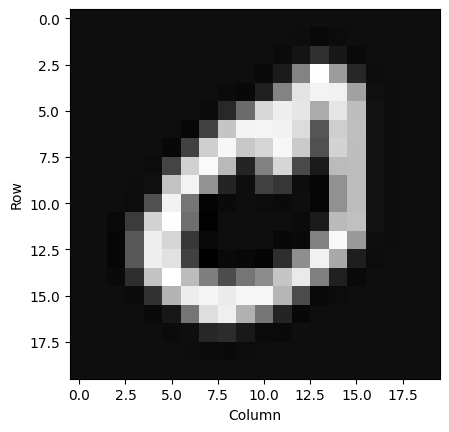

In [16]:
import matplotlib.pyplot as plt

def plot_digit(x):
    transposed_x = list(map(list, zip(*x)))
    plt.imshow(transposed_x, cmap='gray')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()


plot_digit(reshaped_x[0])


### 2.3. Activation Function

> As mentioned above, the sigmoid function will be used as the activation function. Activation function belongs to the hidden layer of the neural network. You can reuse the last week's logistic regression sigmoid method that we coded, as it mostly remains the same. The only difference now is that you should consider adding the implementation for scalar, vector and matrix if passed as the function parameters.


In [11]:
def sigmoid(z):
  pass

In [50]:
import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

In [51]:
z = 0
print(sigmoid(z))

0.5


### 2.4. Prediction
> Since we already covered the input and hidden layer, now all that is left to do, is to go over the output layer and the prediction itself.
In the method below, you should trigger the activation function (sigmoid) twice, since we have two hidden layers, a1 and a2 (see the architecture on the figure above).

> $ h(x) = \text{sigmoid}(\mathbf{\theta}^T \mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^T \mathbf{x}}} $,  where $ \theta $ represents the weights.

> The first time, you will pass the input feature (one record from the X dataset) and [first weight w1](https://drive.google.com/file/d/1ygPbrtxC1yOro9iOUT2Kfl4QHdZEbTul/view?usp=sharing) as the function parameters. This first weight contains 25 activation units. This represents the first hidden layer, or a1.

> The second time you call the activation function, would be for the second hidden layer, a2. Now, you will pass the output of the first layer as the parameter, as well as the [second weight w2](https://drive.google.com/file/d/1_qUXJnyki5yusWDtymwNqNL623hx6XyQ/view?usp=sharing), which now contains 10 activation units.

> **Note:** You can download the trained weights from the Drive links above, or from the [LMS](https://learning.ibu.edu.ba/mod/folder/view.php?id=81420).

> Lastly, this function should return the predicted digit, or output. We can obtain that value by finding the maximum element that the a2 layer returned (where the maximum activation occured among the neurons), taking its index, adding 1 and taking the modulo of the whole expression with 10.

> **Additional explanation**: Since the labels in the dataset are mapped from 1 to 10 (with 10 representing the digit '0'), we add 1 to the predicted index to account for this mapping. This adjustment ensures that the predicted value aligns with the labeling convention used in the dataset.
Finally, % 10 is used to handle the case where the predicted index exceeds 9 (which would occur if the maximum activation corresponds to the digit '0'). Taking the modulo 10 ensures that the predicted value is always within the range of 0 to 9.

> **Note**: Do not forget to add the bias term (vector of ones column) whenever you are working with the records from the $ X $ input features.

In [19]:
def predict(W1, W2, x):
  pass

In [57]:
def dot_product(vector1, vector2):
    return sum(x * y for x, y in zip(vector1, vector2) if isinstance(x, (int, float)) and isinstance(y, (int, float)))

def predict(W1, W2, x):
    x = [1] + x
    a1 = [sigmoid(dot_product(w, x)) for w in W1]
    a1 = [1] + a1
    a2 = [sigmoid(dot_product(w, a1)) for w in W2]
    predicted_indices = [i for i, val in enumerate(a2) if val == max(a2)]
    predicted_digits = [(idx + 1) % 10 for idx in predicted_indices]

    return predicted_digits


In [53]:
predicted_digit = predict(w1, w2, x[1])
print("Predicted digit:", predicted_digit)

Predicted digit: [3]


### 2.5. Model Evaluation

Create a function to calculate the confusion matrix values, and using them calculate the accuracy, recall, precision, sensitivity, and f-score (per class).
- $  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $


- $ \text{Recall/Sensitivity} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $


- $ \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} $


- $ \text{F-score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $





> Confusion matrices represent counts from predicted and actual values. The output “TN” stands for True Negative which shows the number of negative examples classified accurately. Similarly, “TP” stands for True Positive which indicates the number of positive examples classified accurately. The term “FP” shows False Positive value, i.e., the number of actual negative examples classified as positive; and “FN” means a False Negative value which is the number of actual positive examples classified as negative.

>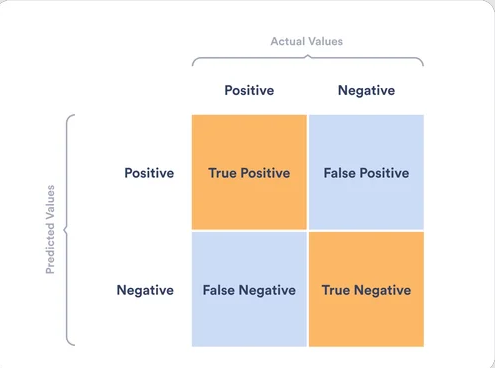

In [23]:
def confusion_matrix(y_pred, y_actual):
  pass

In [68]:
def confusion_matrix(y_pred, y_actual):
  TP = sum(1 for p, a in zip(y_pred, y_actual) if p == 1 and a == 1)
  FP = sum(1 for p, a in zip(y_pred, y_actual) if p == 1 and a == 0)
  FN = sum(1 for p, a in zip(y_pred, y_actual) if p == 0 and a == 1)
  TN = sum(1 for p, a in zip(y_pred, y_actual) if p == 0 and a == 0)

  total_predictions = TP + FP + FN + TN

  if total_predictions == 0:
    accuracy = 0
  else:
    accuracy = (TP + TN) / total_predictions

    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    sensitivity = recall
    f_score = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    return TP, FP, FN, TN, accuracy, recall, precision, sensitivity, f_score


In [71]:
y_pred = predict(w1, w2, x)
TP, FP, FN, TN, accuracy, recall, precision, sensitivity, f_score = confusion_matrix(y_pred, y)


print("True Positives:", TP)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Negatives:", TN)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F-score:", f_score)


TypeError: cannot unpack non-iterable NoneType object

In [63]:
print(type(y_pred))  # Provjeriti tip podataka y_pred
print(y_pred)        # Ispisati y_pred da vidimo kako izgleda


<class 'list'>
[4]


### 2.6. Model Testing Playground

> You can play a bit by plotting the digits on the different indexes and calling the predict function to compare the results.

In [74]:
x = read_file('./sample_data/x.csv')
index = int(input("Enter an index: "))
plot_digit(x[index])
print("Predicted value is:  ", predict(w1, w2, x[index]))

Enter an index: 0


TypeError: 'float' object is not iterable

TypeError: object of type 'float' has no len()